In [12]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
os.getcwd()

'/Users/dongminsun/Desktop'

In [3]:
os.chdir('/Users/dongminsun/Desktop')

In [17]:
df_weather = pd.read_excel("Weather_NFL.xlsx", sep=',', header=0, na_values=["?"])
#df_weather = pd.read_excel("Weather_NFL.xlsx", sep=',', index_col=0, header=0)
df_weather.head(5)

,play_id,game_id,home_team,away_team,yardline_100,game_date,Temperature,weather,time,Winner,DOME
0,46,2009091000,PIT,TEN,30.0,2009-09-10,67f,mostly cloudy,Evening,PIT,NO
1,68,2009091000,PIT,TEN,58.0,2009-09-10,67f,mostly cloudy,Evening,PIT,NO
2,92,2009091000,PIT,TEN,53.0,2009-09-10,67f,mostly cloudy,Evening,PIT,NO
3,113,2009091000,PIT,TEN,56.0,2009-09-10,67f,mostly cloudy,Evening,PIT,NO
4,139,2009091000,PIT,TEN,56.0,2009-09-10,67f,mostly cloudy,Evening,PIT,NO


In [21]:
df_weather = df_weather.fillna('')    

In [9]:
temperature = df_weather.groupby(['Temperature']).sum() 
print(len(temperature))
weather = df_weather.groupby(["weather"]).sum()
print(len(weather))

111
98


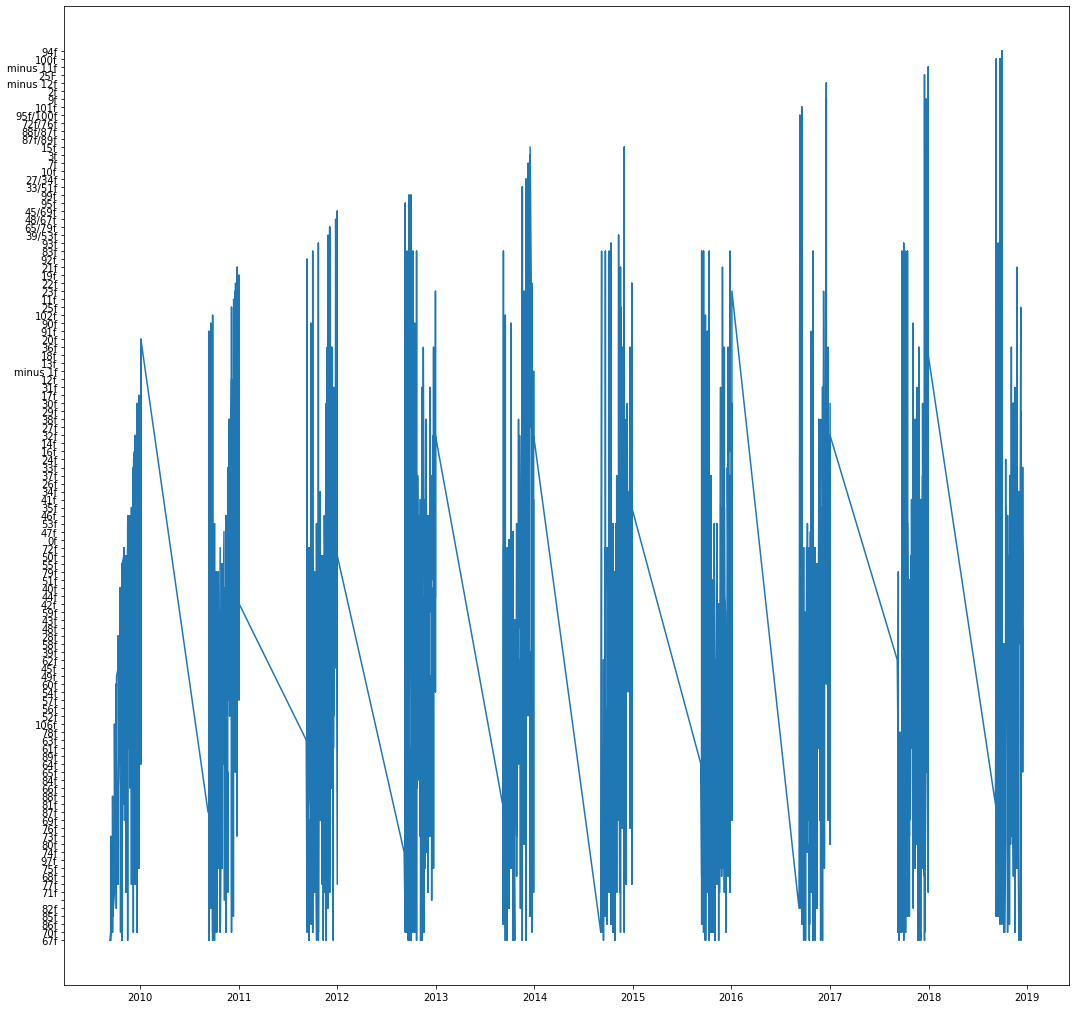

In [22]:
df_weather["game_date"]=pd.to_datetime(df_weather.game_date,format="%Y-%m-%d")
df_weather.index=df_weather['game_date']
plt.figure(figsize=(18,18))
plt.plot(df_weather["Temperature"],label='Temperature trend over years')

# Performance

# split train/test into 80/20

In [23]:
df_drive = pd.read_csv("drives_analysis.csv")
df_drive.head()

,points_scored,home_team,cd_start_yds_to_go,cd_start_time_left,cd_start_score_diff,cd_plays,cd_run_percentage,cd_drive_length,cd_avg_yds_to_go_3rd,cd_avg_first_yds_gain,ld_plays,ld_drive_length,ld_expl_run,ld_expl_pass,ld_start_yds_to_go,pd_expl_pass,pd_expl_run,pd_average_points,pd_average_plays,pd_average_top,pd_average_sacks,pd_average_tfl,pd_avg_interceptions,pd_passer_rating,cd_net_penatly_yd_play,cd_net_penalties_play,cd_pass_yard_att,cd_rush_yard_att,cd_sacks_play,cd_tfl_play,cd_expl_runs_play,cd_expl_pass_play,cd_pass_completion_pct,cd_third_conversions,pd_run_percentage,pd_pass_yard_att,pd_rush_yard_att,pd_pass_completion_pct,month_1,month_9,month_10,month_11,month_12,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,ld_outcome_end_of_half,ld_outcome_field_goal,ld_outcome_fumble_lost,ld_outcome_interception,ld_outcome_no_ld,ld_outcome_punt,ld_outcome_touchdown,ld_outcome_turnover_on_downs,ld_opp_outcome_end_of_half,ld_opp_outcome_field_goal,ld_opp_outcome_fumble_lost,ld_opp_outcome_interception,ld_opp_outcome_no_ld,ld_opp_outcome_punt,ld_opp_outcome_touchdown,ld_opp_outcome_turnover_on_downs
0,0.0,1,53.0,3593.0,0.0,4,0.333333,86.0,8.0,5.000000,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.240904,0.0,0.0,2.500000,-3.0,0.000000,0.250000,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.0,0,94.0,3460.0,0.0,3,0.500000,102.0,6.0,0.000000,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.240904,0.0,0.0,4.000000,-2.0,0.000000,0.333333,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.0,1,22.0,3348.0,0.0,5,0.250000,179.0,2.0,1.000000,4,86.0,0,0,53.0,0.0,0.0,0.0,4.0,86.0,0.0,1.0,0.0,56.250000,0.0,0.0,0.000000,-1.0,0.200000,0.200000,0.0,0.0,0.666667,0.0,0.333333,2.5,-3.0,0.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,3.0,0,19.0,3177.0,0.0,5,0.250000,92.0,7.0,18.333333,3,102.0,0,0,94.0,0.0,0.0,0.0,3.0,102.0,0.0,1.0,0.0,83.333333,0.0,-0.2,6.666667,3.0,0.000000,0.000000,0.0,0.2,0.333333,0.0,0.500000,4.0,-2.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.0,1,70.0,3069.0,0.0,3,0.500000,102.0,7.0,1.000000,5,179.0,0,0,22.0,0.0,0.0,0.0,4.5,132.5,0.5,1.0,0.0,64.583333,0.0,0.0,-9.000000,2.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.285714,1.0,-2.0,0.6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [27]:
drive_names = df_drive.columns.values
print(len(drive_names))

64


In [26]:
y = df_drive['cd_plays']
X = df_drive[drive_names[6:]]
X.head()

,cd_run_percentage,cd_drive_length,cd_avg_yds_to_go_3rd,cd_avg_first_yds_gain,ld_plays,ld_drive_length,ld_expl_run,ld_expl_pass,ld_start_yds_to_go,pd_expl_pass,pd_expl_run,pd_average_points,pd_average_plays,pd_average_top,pd_average_sacks,pd_average_tfl,pd_avg_interceptions,pd_passer_rating,cd_net_penatly_yd_play,cd_net_penalties_play,cd_pass_yard_att,cd_rush_yard_att,cd_sacks_play,cd_tfl_play,cd_expl_runs_play,cd_expl_pass_play,cd_pass_completion_pct,cd_third_conversions,pd_run_percentage,pd_pass_yard_att,pd_rush_yard_att,pd_pass_completion_pct,month_1,month_9,month_10,month_11,month_12,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,ld_outcome_end_of_half,ld_outcome_field_goal,ld_outcome_fumble_lost,ld_outcome_interception,ld_outcome_no_ld,ld_outcome_punt,ld_outcome_touchdown,ld_outcome_turnover_on_downs,ld_opp_outcome_end_of_half,ld_opp_outcome_field_goal,ld_opp_outcome_fumble_lost,ld_opp_outcome_interception,ld_opp_outcome_no_ld,ld_opp_outcome_punt,ld_opp_outcome_touchdown,ld_opp_outcome_turnover_on_downs
0,0.333333,86.0,8.0,5.000000,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.240904,0.0,0.0,2.500000,-3.0,0.000000,0.250000,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.500000,102.0,6.0,0.000000,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.240904,0.0,0.0,4.000000,-2.0,0.000000,0.333333,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.250000,179.0,2.0,1.000000,4,86.0,0,0,53.0,0.0,0.0,0.0,4.0,86.0,0.0,1.0,0.0,56.250000,0.0,0.0,0.000000,-1.0,0.200000,0.200000,0.0,0.0,0.666667,0.0,0.333333,2.5,-3.0,0.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.250000,92.0,7.0,18.333333,3,102.0,0,0,94.0,0.0,0.0,0.0,3.0,102.0,0.0,1.0,0.0,83.333333,0.0,-0.2,6.666667,3.0,0.000000,0.000000,0.0,0.2,0.333333,0.0,0.500000,4.0,-2.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.500000,102.0,7.0,1.000000,5,179.0,0,0,22.0,0.0,0.0,0.0,4.5,132.5,0.5,1.0,0.0,64.583333,0.0,0.0,-9.000000,2.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.285714,1.0,-2.0,0.6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


Build the training and testing dataset¶

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [29]:
# train the decision tree on the training data

from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)

In [30]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [31]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False)

Accuracy:0.861 

Classification report
              precision    recall  f1-score   support

           3       0.82      0.82      0.82      1421
           4       0.88      0.88      0.88      2617
           5       0.82      0.83      0.83      1167
           6       0.85      0.86      0.85      1298
           7       0.90      0.88      0.89      1110
           8       0.89      0.89      0.89       789
           9       0.88      0.91      0.90       597
          10       0.91      0.88      0.89       495
          11       0.91      0.93      0.92       315
          12       0.83      0.83      0.83       224
          13       0.92      0.81      0.86       154
          14       0.59      0.73      0.65        66
          15       0.58      0.55      0.56        40
          16       0.25      0.21      0.23        19
          17       0.14      0.09      0.11        11
          18       0.17      0.17      0.17         6
          19       0.00      0.00      0.0

/Users/dongminsun/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Selection

In [37]:
from sklearn import feature_selection
import sklearn

In [40]:
#sklearn.feature_selection.f_classif(X_train, y_train)

In [44]:
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier(criterion='entropy')

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

 1  0.3757
 6  0.6290
11  0.6961
16  0.7860
21  0.8525
26  0.8473
31  0.8470
36  0.8649
41  0.8620
46  0.8612
51  0.8584
56  0.8587
61  0.8580
66  0.8558
71  0.8564
76  0.8547
81  0.8555
86  0.8540
91  0.8543
96  0.8531


In [45]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

7


Optimal percentile of features:36 

Optimal number of features:20 



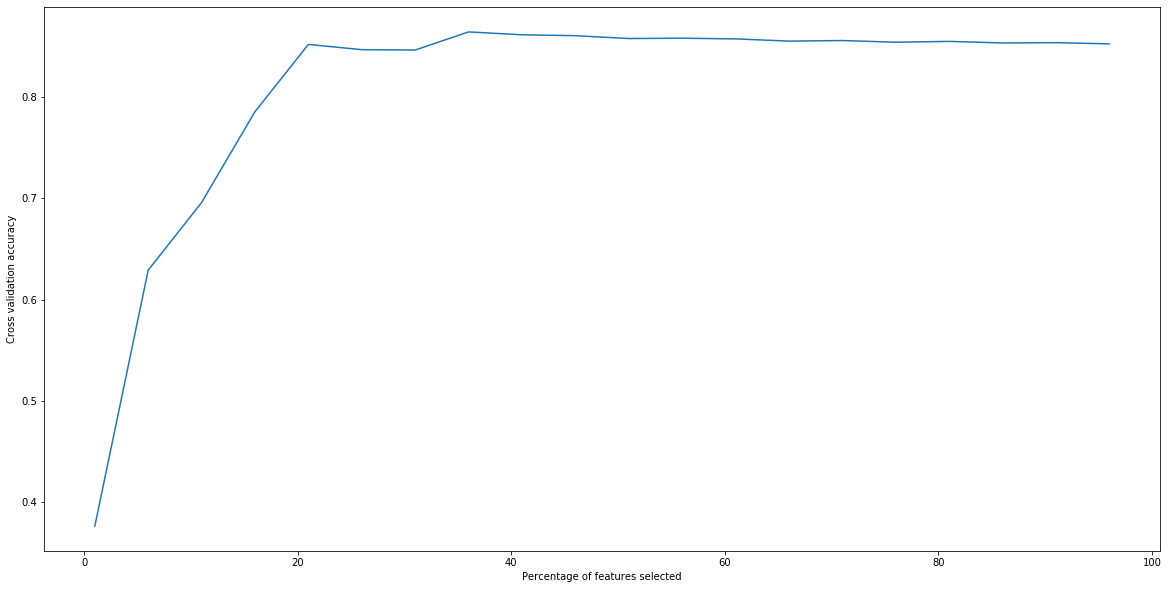

In [46]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

Evaluate our best number of features on the test set¶


In [48]:
fs = feature_selection.SelectKBest(feature_selection.f_classif, optimal_num_features)
X_train_fs = fs.fit_transform(X_train, y_train)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False)

Accuracy:0.870 

Classification report
              precision    recall  f1-score   support

           3       0.83      0.84      0.84      1421
           4       0.89      0.88      0.88      2617
           5       0.84      0.85      0.85      1167
           6       0.86      0.88      0.87      1298
           7       0.90      0.90      0.90      1110
           8       0.89      0.88      0.88       789
           9       0.91      0.92      0.91       597
          10       0.93      0.88      0.90       495
          11       0.91      0.94      0.93       315
          12       0.84      0.82      0.83       224
          13       0.89      0.85      0.87       154
          14       0.72      0.67      0.69        66
          15       0.48      0.53      0.50        40
          16       0.17      0.26      0.20        19
          17       0.17      0.09      0.12        11
          18       0.25      0.17      0.20         6
          19       0.00      0.00      0.0

# Model Selection

In [49]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dt, X_train_fs, y_train, cv=20)
print("Entropy criterion accuracy on cv: {0:.3f}".format(scores.mean()))

dt = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(dt, X_train_fs, y_train, cv=20)
print("Gini criterion accuracy on cv: {0:.3f}".format(scores.mean()))

Entropy criterion accuracy on cv: 0.871
Gini criterion accuracy on cv: 0.886


In [50]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
measure_performance(X_test_fs, y_test, dt, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.874 

Classification report
              precision    recall  f1-score   support

           3       0.83      0.85      0.84      1421
           4       0.89      0.88      0.89      2617
           5       0.85      0.86      0.85      1167
           6       0.87      0.88      0.88      1298
           7       0.90      0.90      0.90      1110
           8       0.89      0.89      0.89       789
           9       0.91      0.92      0.92       597
          10       0.92      0.88      0.90       495
          11       0.91      0.93      0.92       315
          12       0.83      0.83      0.83       224
          13       0.90      0.84      0.87       154
          14       0.72      0.70      0.71        66
          15       0.47      0.55      0.51        40
          16       0.22      0.26      0.24        19
          17       0.14      0.09      0.11        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.0

In [62]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.set_params(max_depth=25)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)

# max_depth = 25 seems to work the best, and larger values seem to lead to over-fitting

Accuracy:0.868 

